In [1]:
suppressMessages(library('dplyr'))
suppressMessages(library('quantmod'))
suppressMessages(library('repr'))
suppressMessages(library('xlsx'))
suppressMessages(library('derivmkts'))
suppressMessages(library('ggplot2'))
suppressMessages(library('moments'))
suppressMessages(library('bizdays'))
suppressMessages(library('lubridate'))
# This changes the size of plots
options(repr.plot.width = 5.5, repr.plot.height =4)

Warning message:
“package ‘moments’ was built under R version 3.6.3”

In [2]:
TSLA_OPTIONS = xlsx::read.xlsx('Data/TSLA_OPTIONS.xlsx', sheetName = "Sheet1")

TSLA_STOCK = xlsx::read.xlsx('Data/TSLA_STOCK.xlsx', sheetName = "Sheet1")


n_row = dim(TSLA_STOCK)[1]
print(paste(c("Total Number of Rows = ", n_row), collapse = ''))

n_col = dim(TSLA_STOCK)[2]
print(paste(c("Total Number of Columns = ", n_col), collapse = ''))

[1] "Total Number of Rows = 717"
[1] "Total Number of Columns = 7"


In [50]:
# convert date to "Date" variable
TSLA_STOCK$Date = as.Date(TSLA_STOCK$Date, format="%Y-%m-%d")

In [51]:
min(TSLA_STOCK$Date)

[1] "2019-01-02"

In [52]:
max(TSLA_STOCK$Date)

[1] "2021-11-03"

In [53]:
max(TSLA_STOCK$Date) - min(TSLA_STOCK$Date)

Time difference of 1036 days

In [54]:
head(TSLA_STOCK)

,Date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-02,61.220,63.026,59.760,62.024,58293000,62.024
2,2019-01-03,61.400,61.880,59.476,60.072,34826000,60.072
3,2019-01-04,61.200,63.600,60.546,63.538,36970500,63.538
4,2019-01-07,64.344,67.348,63.550,66.992,37756000,66.992
5,2019-01-08,68.392,68.802,65.404,67.070,35042500,67.070
6,2019-01-09,67.100,68.700,66.294,67.706,27164500,67.706


In [55]:
cal <-  create.calendar(name="mycal", weekdays=c("saturday", "sunday"))
start_date = min(TSLA_STOCK$Date); start_date
end_date = max(TSLA_STOCK$Date); end_date
x = as.numeric(bizdays::bizdays(start_date, end_date, cal = cal))

#print(paste(c("Total Number of Trading Days .. ", x), collapse = ''))

[1] "2019-01-02"

[1] "2021-11-03"

---

### How many exp dates do we have?

In [36]:
#n_row = dim(TSLA_OPTIONS)[1]
#n_col = dim(TSLA_OPTIONS)[2]

In [37]:
length(unique(TSLA_OPTIONS$Strike))
dates = unique(TSLA_OPTIONS$Exp_date)
dates

[1] 195

[1] 11/5/2021  11/12/2021 11/19/2021 11/26/2021 12/03/2021 12/10/2021 12/17/2021
7 Levels: 11/12/2021 11/19/2021 11/26/2021 11/5/2021 12/03/2021 ... 12/17/2021

In [38]:
str(TSLA_OPTIONS)

'data.frame':	1925 obs. of  16 variables:
 $ Strike           : num  50 100 150 200 250 300 310 320 330 350 ...
 $ Last             : num  1146 1096 1044 996 927 ...
 $ Chg              : num  16.6 28.21 6.06 5.6 -8.94 ...
 $ Bid              : num  1163 1113 1063 1013 963 ...
 $ Ask              : num  1165 1115 1065 1015 965 ...
 $ Vol              : num  9 7 2 4 1 5 3 2 1 1 ...
 $ OI               : num  5 7 2 22 1 5 2 3 2 0 ...
 $ LastTradeTime    : POSIXct, format: "2021-11-03 19:20:48" "2021-11-03 19:20:48" ...
 $ IV               : num  18.64 14.26 11.85 10.2 8.95 ...
 $ ITM              : Factor w/ 2 levels "FALSE","TRUE": 2 2 2 2 2 2 2 2 2 2 ...
 $ INDEX            : Factor w/ 1925 levels "TSLA211105C00050000",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Exp_date         : Factor w/ 7 levels "11/12/2021","11/19/2021",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ TYPE             : Factor w/ 2 levels "CALL","PUT": 1 1 1 1 1 1 1 1 1 1 ...
 $ Snapshot_Date    : Factor w/ 1 level "11/3/2021": 1 1 1 1 1 1 1 1

In [39]:
levels(droplevels(TSLA_OPTIONS))

NULL

In [47]:
#l = length(unique(TSLA_OPTIONS$Exp_date))
#new_df = TSLA_OPTIONS
#new_df$Exp_date = as.character(new_df$Exp_date)

#for(i in 1:l){
#    date_i = as.character(dates[i])

#    sub_OPTIONS = subset(new_df, Exp_date == date_i)
#    print(dim(sub_OPTIONS))
#    print(min(sub_OPTIONS$Strike))
#    print(max(sub_OPTIONS$Strike))
#    print("   ")
#}

---

In [42]:
colnames(TSLA_OPTIONS)

[1] "Strike"            "Last"              "Chg"              
 [4] "Bid"               "Ask"               "Vol"              
 [7] "OI"                "LastTradeTime"     "IV"               
[10] "ITM"               "INDEX"             "Exp_date"         
[13] "TYPE"              "Snapshot_Date"     "Years_to_Exp_Date"
[16] "Avg_Price"

### Generate a vector of log returns 

$$\text{Log Returns} = \log\Big(\frac{R_{i}}{R_{i-1}}\Big)$$

In [56]:
log_returns = NULL

In [57]:
n_row

[1] 717

In [58]:
for(i in 1:n_row){

    log_returns[i] = log(TSLA_STOCK$TSLA.Close[i] / TSLA_STOCK$TSLA.Open[i])

}

print(log_returns[1:5])
TSLA_STOCK$log_returns = log_returns
head(TSLA_STOCK)

[1]  0.01304742 -0.02186604  0.03749091  0.04032944 -0.01951898


,Date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted,log_returns
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-02,61.220,63.026,59.760,62.024,58293000,62.024,0.013047425
2,2019-01-03,61.400,61.880,59.476,60.072,34826000,60.072,-0.021866042
3,2019-01-04,61.200,63.600,60.546,63.538,36970500,63.538,0.037490915
4,2019-01-07,64.344,67.348,63.550,66.992,37756000,66.992,0.040329444
5,2019-01-08,68.392,68.802,65.404,67.070,35042500,67.070,-0.019518979
6,2019-01-09,67.100,68.700,66.294,67.706,27164500,67.706,0.008990803


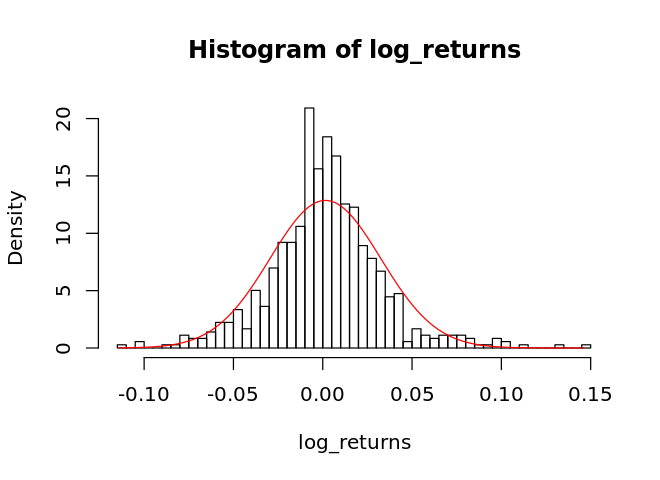

In [59]:
hist(log_returns, breaks = 75, probability = TRUE)

x = seq(min(log_returns),max(log_returns),.001)

y = dnorm(x,mean = mean(log_returns),sd= sd(log_returns))

points(x,y,type = 'l',col='red')


In [60]:
moments::skewness(log_returns) # slightly positive skew..

[1] 0.2844248

In [61]:
shapiro.test(log_returns)


	Shapiro-Wilk normality test

data:  log_returns
W = 0.96894, p-value = 3.355e-11


### Shapiro-Wilk Test

[Penn State - Test for Normality](https://online.stat.psu.edu/stat462/node/147/)


$$H_{0} = \text{The errors follow a normal distribution}$$

$$H_{a} = \text{ The errors do not follow a normal distribution. } $$

- When p-value < Alpha (.05) then we reject the null and accept the alternative. 

- Here p = . 000000000000000022

- Since p < .05, we acccpt the alternative. 

> *The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.*

### What is the Volatility ? 

In [68]:
X = NULL
Y = NULL
Z = NULL
min_value = 5
count = 0
for(i in min_value:400){
    count = count + 1
    X[count] = i

    Y[count] = (sd(TSLA_STOCK$log_returns[1:i]) * sqrt(252)) *  100
    
    # Standard error... 
    Z[count] = (Y[count] / sqrt(2 * i))
}

df = data.frame(X, Y, Z)
#colnames(df) = c("Number of Trading Days", "Annual Volatility",  "Standard Error")
head(df)

,X,Y,Z
,<int>,<dbl>,<dbl>
1,5,47.43579,15.000515
2,6,42.43192,12.249041
3,7,40.80265,10.904967
4,8,37.79611,9.449027
5,9,40.32659,9.505069
6,10,39.16916,8.758490


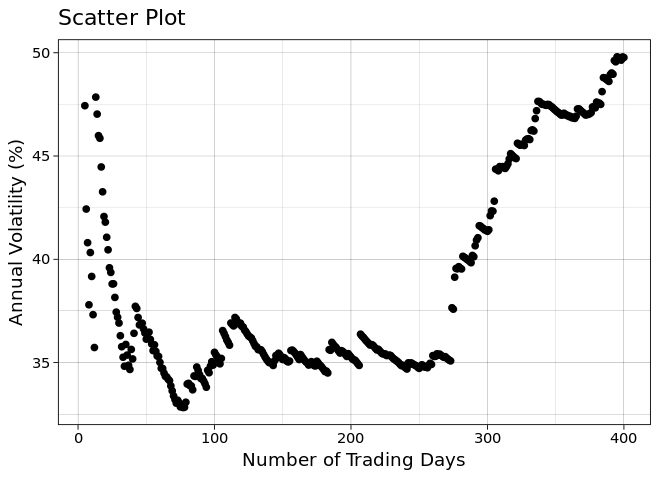

In [69]:
plot_1 <- ggplot(df) +
  geom_point(aes(x = X, y = Y))+
  labs(
    title = "Scatter Plot",
    y = "Annual Volatility (%)",
    x = "Number of Trading Days")

plot_1 + theme_linedraw()  # This is the "theme" for ggplot2

In [70]:
colnames(df) = c("Number of Trading Days", "Annual Volatility",  "Standard Error")
xlsx::write.xlsx(df, "Data/volatility.xlsx", sheetName = "Sheet1", row.names = FALSE)